In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Data Exploration

In [2]:
data = pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


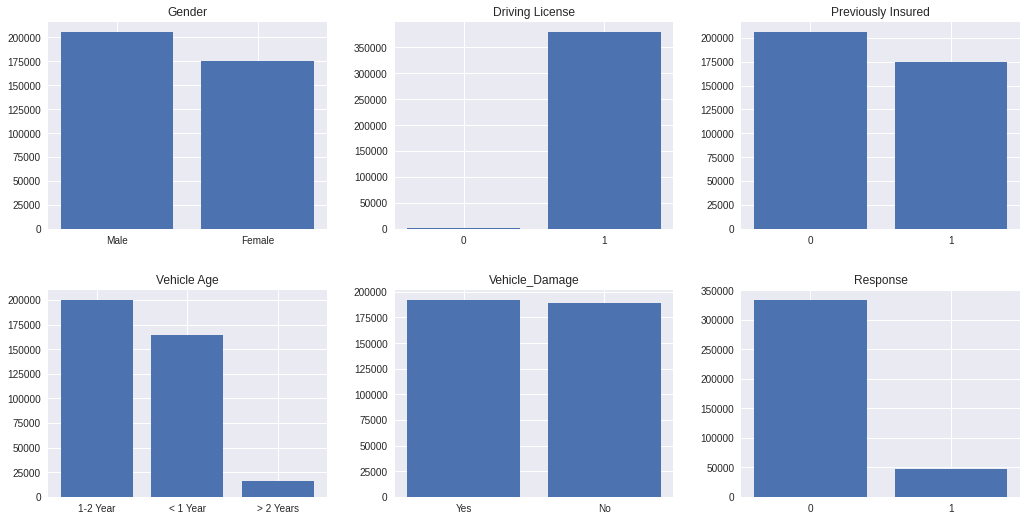

In [4]:
#Explore categorical values

fig, ax = plt.subplots(2, 3, figsize = (15,8))
fig.tight_layout(pad=4.0)

ax[0][0].bar(data.Gender.value_counts().index, data.Gender.value_counts())
ax[0][0].set_title('Gender')

ax[0][1].bar(data.Driving_License.value_counts().index, data.Driving_License.value_counts())
ax[0][1].set_title('Driving License')
ax[0][1].set_xticks([0,1])


ax[0][2].bar(data.Previously_Insured.value_counts().index, data.Previously_Insured.value_counts())
ax[0][2].set_title('Previously Insured')
ax[0][2].set_xticks([0,1])

ax[1][0].bar(data.Vehicle_Age.value_counts().index, data.Vehicle_Age.value_counts())
ax[1][0].set_title('Vehicle Age')

ax[1][1].bar(data.Vehicle_Damage.value_counts().index, data.Vehicle_Damage.value_counts())
ax[1][1].set_title('Vehicle_Damage')

ax[1][2].bar(data.Response.value_counts().index, data.Response.value_counts())
ax[1][2].set_title('Response')
ax[1][2].set_xticks([0,1])

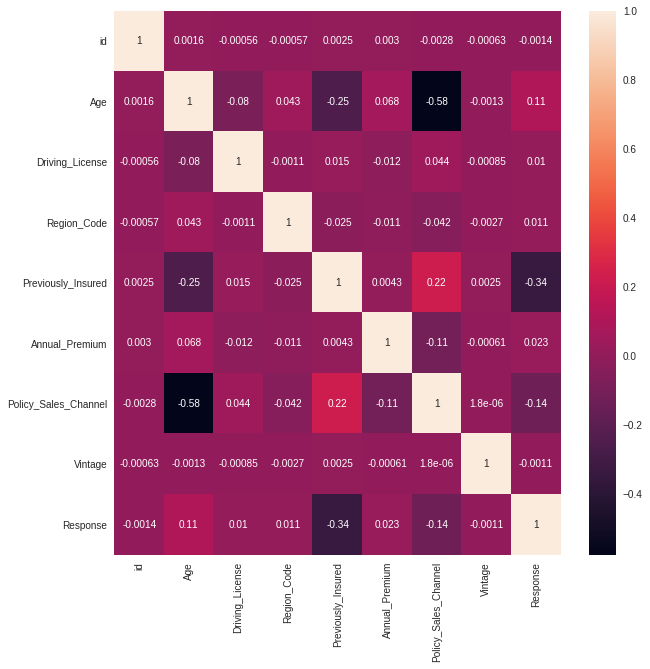

In [5]:
#Correlation
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True, fmt = '0.2g')

In [6]:
#data is highly imbalanced
response_1 = data[data.Response == 1]
response_0 = data[data.Response == 0]
data_new = data.append([response_1]*(len(response_0)//len(response_1) - 1))
print(data_new.Response.value_counts())
data_new = data_new.sample(frac = 1.0, random_state = 0)

num_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage', 'Policy_Sales_Channel']
categorical_col = ['Gender','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

imp_columns = num_cols + categorical_col

y = data_new.Response
x = data_new[imp_columns]

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 0)

0    334399
1    326970
Name: Response, dtype: int64


> # Model

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

#Categorical columns
preprocessor = ColumnTransformer(transformers = [('minmax',MinMaxScaler(), num_cols),('onehot', OneHotEncoder(), categorical_col)])

#model
model = RandomForestClassifier(random_state=0)

#model pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

model_pipeline.fit(x_train, y_train)

predictions = model_pipeline.predict(x_val)

mae = mean_absolute_error(y_val, predictions)
print(mae)

0.0622092525112015


Accuracy =  0.9377907474887985
Recall =  0.9994987468671679
Precision =  0.8882363636363636


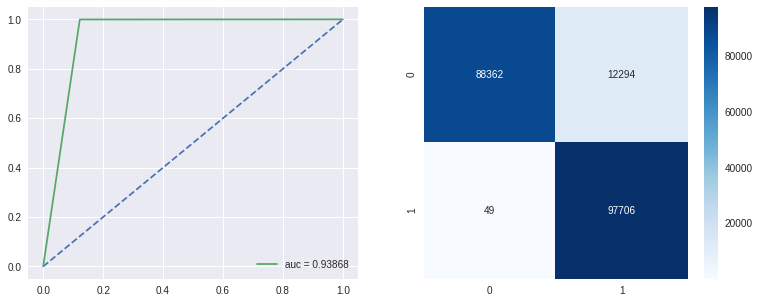

In [8]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score

print('Accuracy = ',accuracy_score(y_val, predictions))
print('Recall = ',recall_score(y_val, predictions))
print('Precision = ',precision_score(y_val, predictions))

cm=confusion_matrix(y_val, predictions)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,5))

fpr, tpr, _ = roc_curve(y_val, predictions)
auc = roc_auc_score(y_val ,predictions)
ax1.plot([0,1],[0,1],linestyle='--')
ax1.plot(fpr,tpr,label="auc = %.5f"% auc)
ax1.legend(loc=4)

sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')

In [9]:
#final running

#test data
test_data = pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')

#fitting on whole train data
model_pipeline.fit(x, y)

#generating predictions
test_predictions = model_pipeline.predict(test_data[imp_columns])

In [10]:
#submission
#output = pd.DataFrame({'ID': test_data.id, 'Response': test_predictions})
#output.to_csv('submission.csv', index=False)
print("Submission saved")

Submission saved
